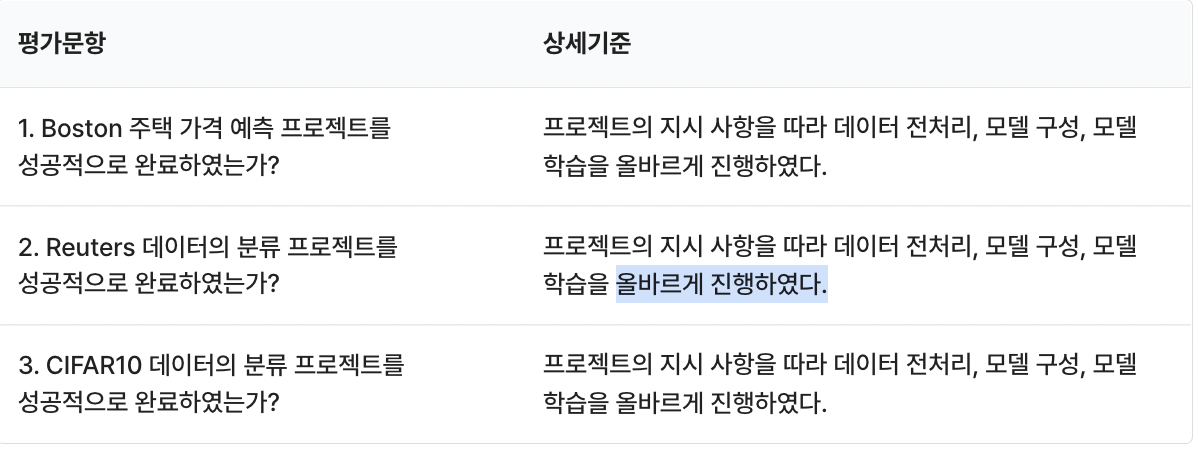

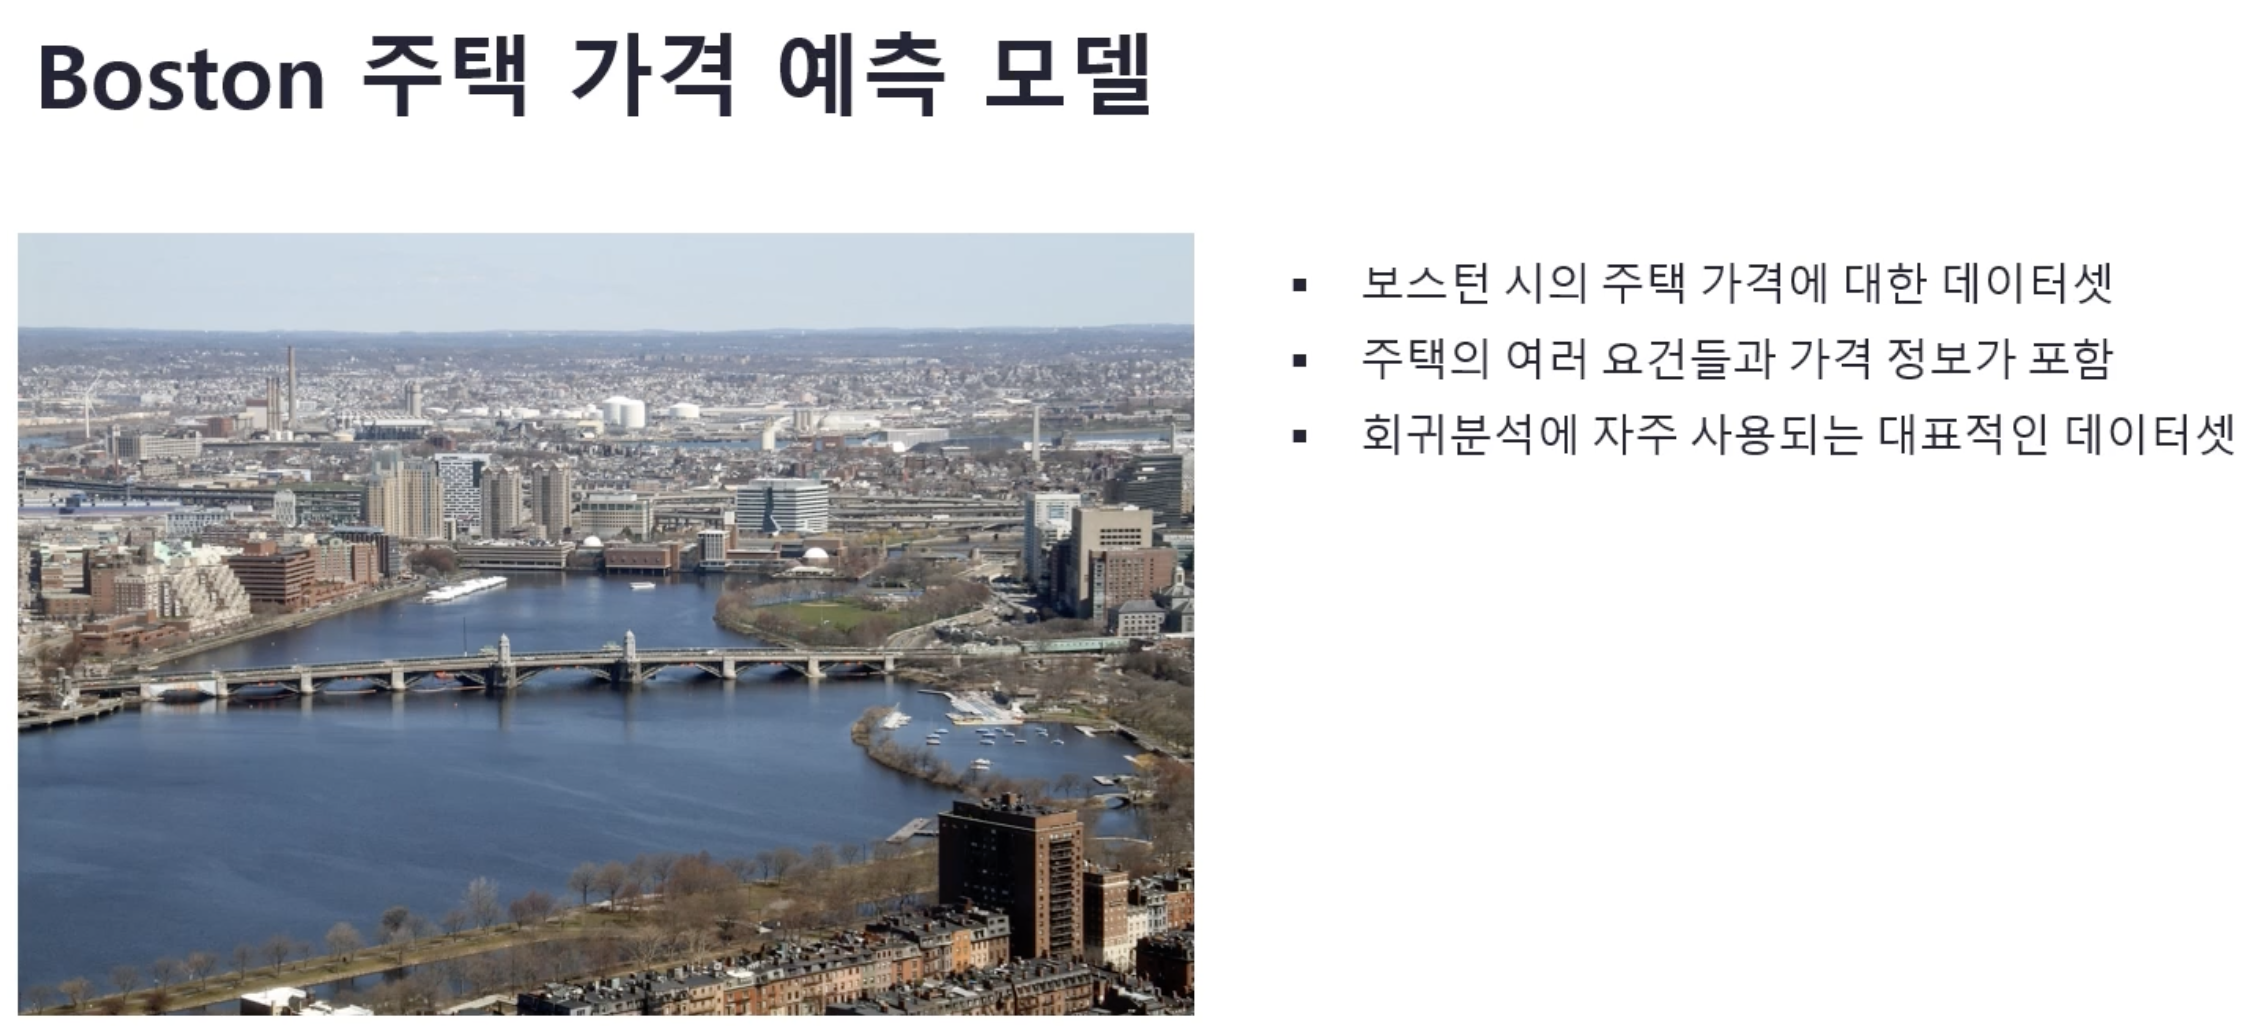

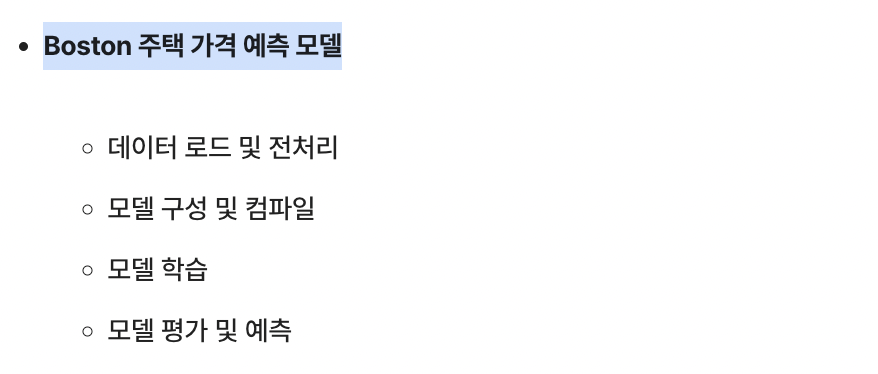

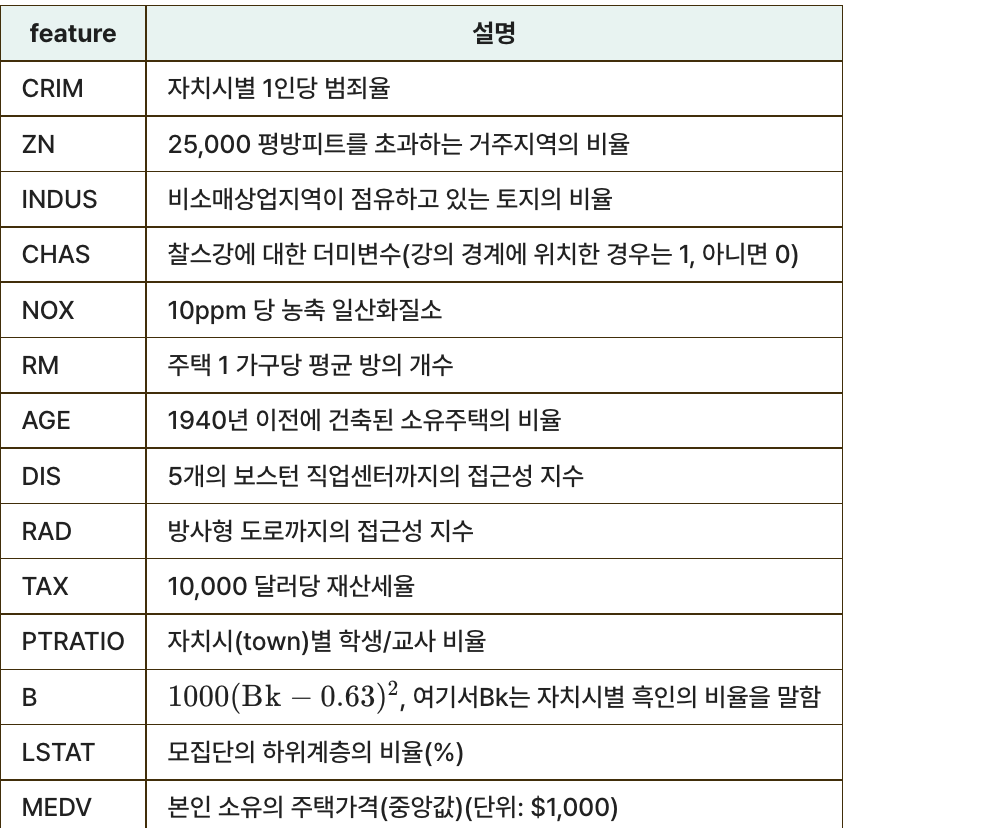

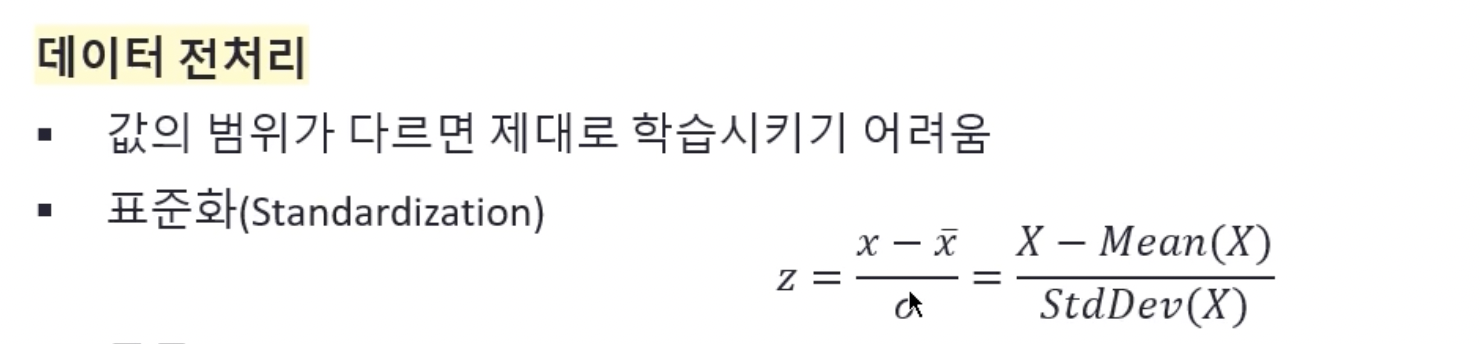

In [156]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "whitegrid")

In [157]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [158]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((404, 13), (404,), (102, 13), (102,))

문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.

`a.mean`  
(__axis=None__, dtype=None, out=None, keepdims=False, *, where=True)

In [159]:
train_data.mean

<function ndarray.mean>

In [160]:
tr_mean = train_data.mean(axis=0)
tr_mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [161]:
train_data = train_data - tr_mean
train_data

array([[ -2.51264057, -11.48019802,  -2.96443069, ...,   2.5240099 ,
         42.11683168,   5.97918317],
       [ -3.72334057,  71.01980198,  -9.07443069, ...,  -3.7759901 ,
         40.59683168,  -9.63081683],
       [  1.15310943, -11.48019802,   6.99556931, ...,   1.7240099 ,
         20.73683168,  -9.48081683],
       ...,
       [ -3.71045057,  23.51980198,  -5.04443069, ...,  -1.5759901 ,
          7.46683168,  -4.91081683],
       [ -1.59593057, -11.48019802,   8.47556931, ...,  -3.7759901 ,
        -92.83316832,   3.04918317],
       [ -3.73072057,  48.51980198,  -8.17443069, ...,  -2.8759901 ,
         21.91683168,  -8.36081683]])

`a.std`  
(__axis=None__, dtype=None, out=None, ddof=0, keepdims=False, *, where=True)

In [162]:
train_data.std

<function ndarray.std>

In [163]:
tr_std = train_data.std(axis= 0)
tr_std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [164]:
train_data = train_data / tr_std
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [165]:
test_data = test_data - tr_mean
test_data

array([[  14.33948943,  -11.48019802,    6.99556931, ...,    1.7240099 ,
        -327.53316832,   16.30918317],
       [  -3.62182057,  -11.48019802,   -1.09443069, ...,   -0.6759901 ,
          40.16683168,    3.46918317],
       [  -3.69014057,  -11.48019802,   -5.91443069, ...,    1.7240099 ,
          42.11683168,   -3.00081683],
       ...,
       [  -1.91134057,  -11.48019802,    8.47556931, ...,   -3.7759901 ,
          34.82683168,  -10.82081683],
       [  -3.38702057,  -11.48019802,   -4.90443069, ...,   -1.0759901 ,
          36.91683168,   -3.03081683],
       [  -0.82111057,  -11.48019802,    8.47556931, ...,   -3.7759901 ,
        -114.62316832,   -2.93081683]])

In [166]:
test_data = test_data / tr_std
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [167]:
train_data.shape[1]

13

문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.

In [179]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils, optimizers

In [180]:
model = models.Sequential()
model.add(layers.Dense(52, activation='relu', input_shape=(train_data.shape[1], ), name='input'))
model.add(layers.Dense(39, activation='relu', name='hidden'))
model.add(layers.Dense(26, activation='relu', name='hidden2'))
model.add(layers.Dense(1, name='output'))

In [181]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 52)                728       
_________________________________________________________________
hidden (Dense)               (None, 39)                2067      
_________________________________________________________________
hidden2 (Dense)              (None, 26)                1040      
_________________________________________________________________
output (Dense)               (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


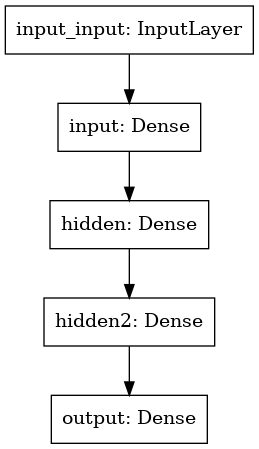

In [182]:
utils.plot_model(model)

In [183]:
model.compile(optimizer="rmsprop",
              loss='mse',
              metrics=['mae', 'mse'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 52)                728       
_________________________________________________________________
hidden (Dense)               (None, 39)                2067      
_________________________________________________________________
hidden2 (Dense)              (None, 26)                1040      
_________________________________________________________________
output (Dense)               (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.

In [184]:
history = model.fit(train_data, train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.25)

Epoch 1/100
10/10 [==============================] - 1s 17ms/step - loss: 536.9904 - mae: 21.5352 - mse: 536.9904 - val_loss: 640.2656 - val_mae: 23.3541 - val_mse: 640.2656
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 486.0865 - mae: 20.3689 - mse: 486.0865 - val_loss: 574.1861 - val_mae: 22.0003 - val_mse: 574.1861
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 421.2714 - mae: 18.7751 - mse: 421.2714 - val_loss: 484.3897 - val_mae: 19.9841 - val_mse: 484.3897
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 339.2230 - mae: 16.5584 - mse: 339.2230 - val_loss: 381.4359 - val_mae: 17.4322 - val_mse: 381.4359
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 251.0339 - mae: 13.8470 - mse: 251.0339 - val_loss: 272.7458 - val_mae: 14.2865 - val_mse: 272.7458
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 166.6255 - mae: 10.9095 - mse: 166.6255 - val_loss: 174.7692 

Epoch 50/100
10/10 [==============================] - 0s 5ms/step - loss: 8.0257 - mae: 1.9841 - mse: 8.0257 - val_loss: 12.8630 - val_mae: 2.4829 - val_mse: 12.8630
Epoch 51/100
10/10 [==============================] - 0s 7ms/step - loss: 7.7904 - mae: 1.9260 - mse: 7.7904 - val_loss: 12.6682 - val_mae: 2.4785 - val_mse: 12.6682
Epoch 52/100
10/10 [==============================] - 0s 5ms/step - loss: 7.8404 - mae: 1.9257 - mse: 7.8404 - val_loss: 12.8035 - val_mae: 2.5024 - val_mse: 12.8035
Epoch 53/100
10/10 [==============================] - 0s 6ms/step - loss: 7.8651 - mae: 1.9583 - mse: 7.8651 - val_loss: 13.3618 - val_mae: 2.6000 - val_mse: 13.3618
Epoch 54/100
10/10 [==============================] - 0s 5ms/step - loss: 7.7738 - mae: 1.9377 - mse: 7.7738 - val_loss: 13.6538 - val_mae: 2.6314 - val_mse: 13.6538
Epoch 55/100
10/10 [==============================] - 0s 5ms/step - loss: 7.8287 - mae: 1.9227 - mse: 7.8287 - val_loss: 13.0726 - val_mae: 2.5863 - val_mse: 13.0726
Epoc

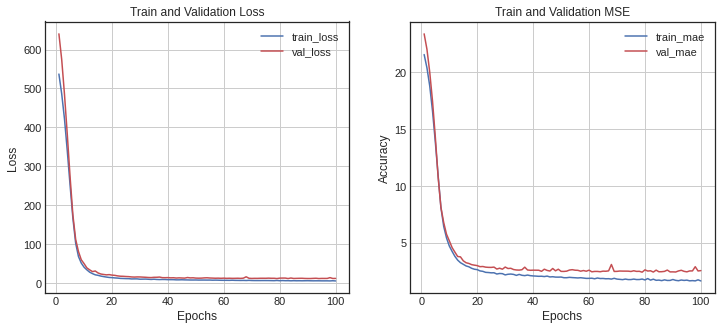

In [185]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

In [186]:
model.evaluate(test_data, test_labels, verbose= 2)

4/4 - 0s - loss: 22.8375 - mae: 2.8705 - mse: 22.8375


[22.83753204345703, 2.8704822063446045, 22.83753204345703]

(train_data, train_labels), (test_data, test_labels)

In [211]:
train_labels.shape, test_labels.shape

((404,), (102,))

In [244]:
train_data[:, 9].shape

(404,)

In [214]:
train_data[:102].shape, test_data.shape

((102, 13), (102, 13))

In [234]:
test_labels.shape, test_data.shape[:1]

((102,), (102,))

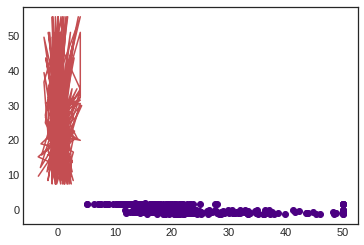

In [245]:
result = model.predict(test_data)
plt.scatter(train_labels, train_data[:, 9], color= "indigo")
plt.plot(test_data, result, 'r')
plt.show()

In [ ]:
이따가...

https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/  
https://tensorflow.blog/케라스-딥러닝/3-6-주택-가격-예측-회귀-문제/

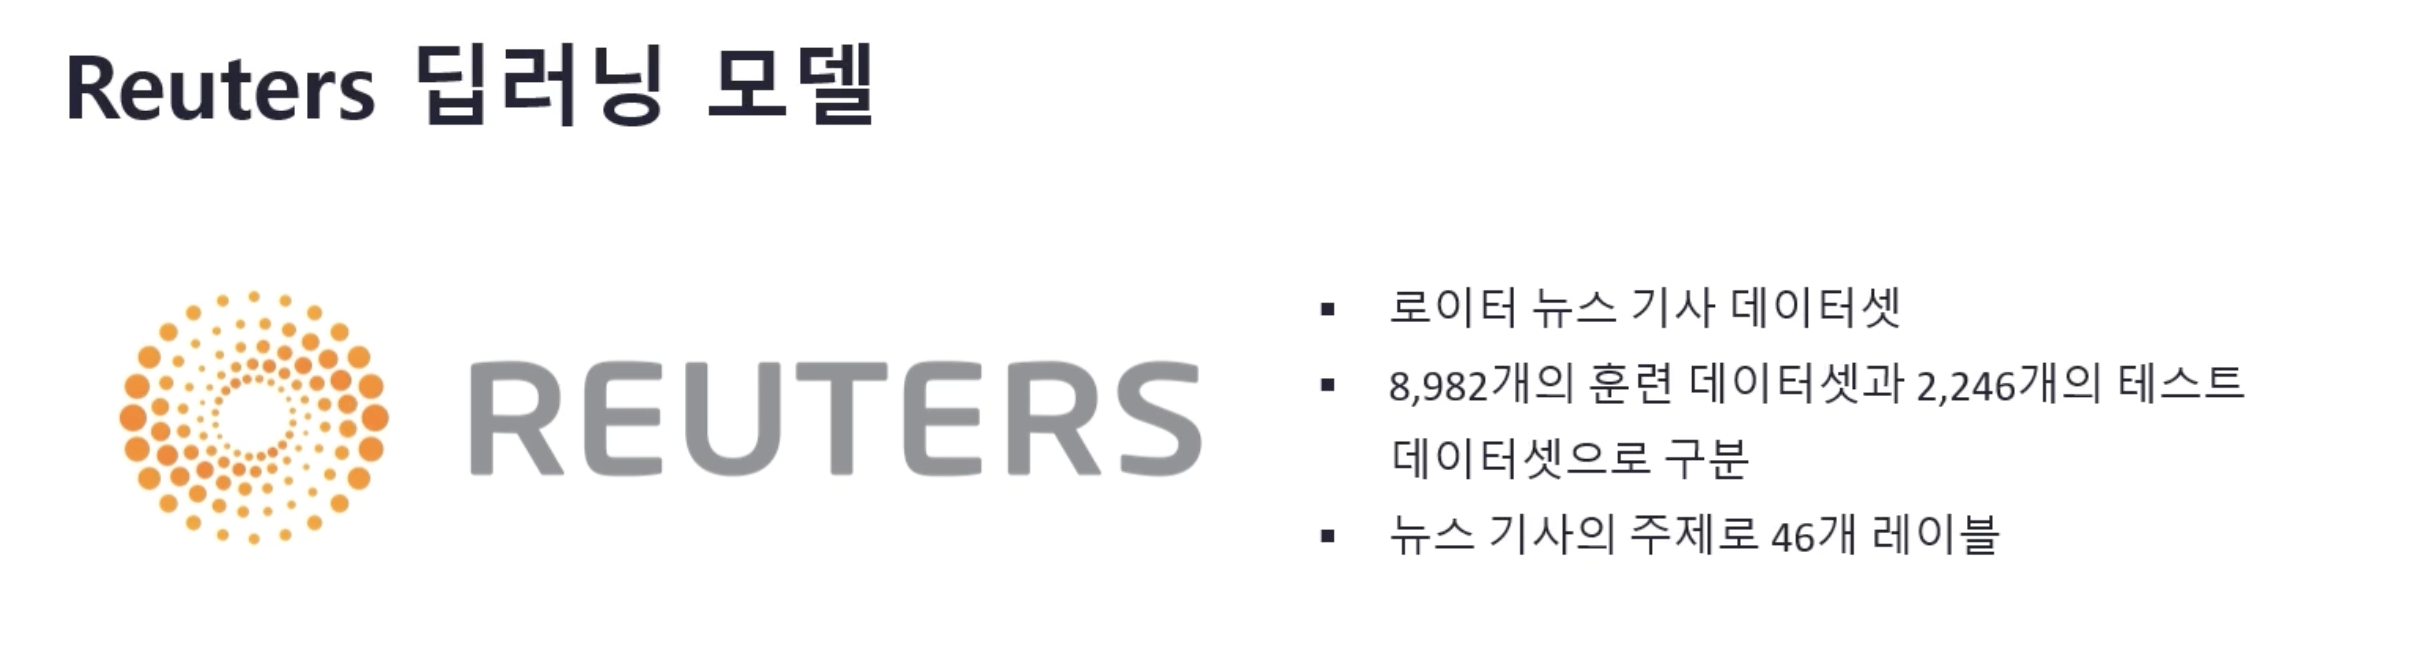

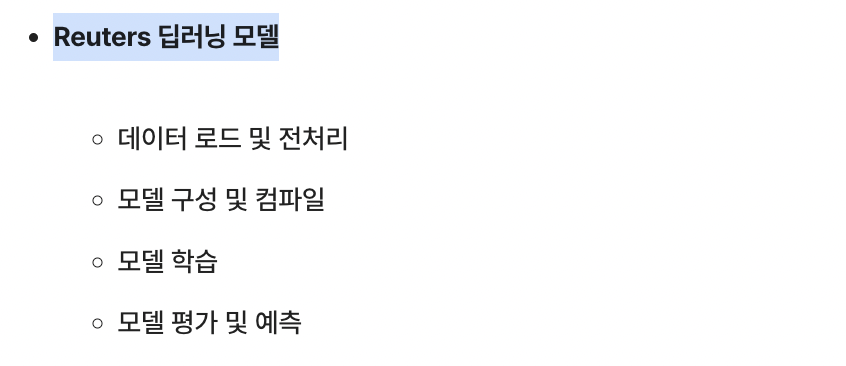

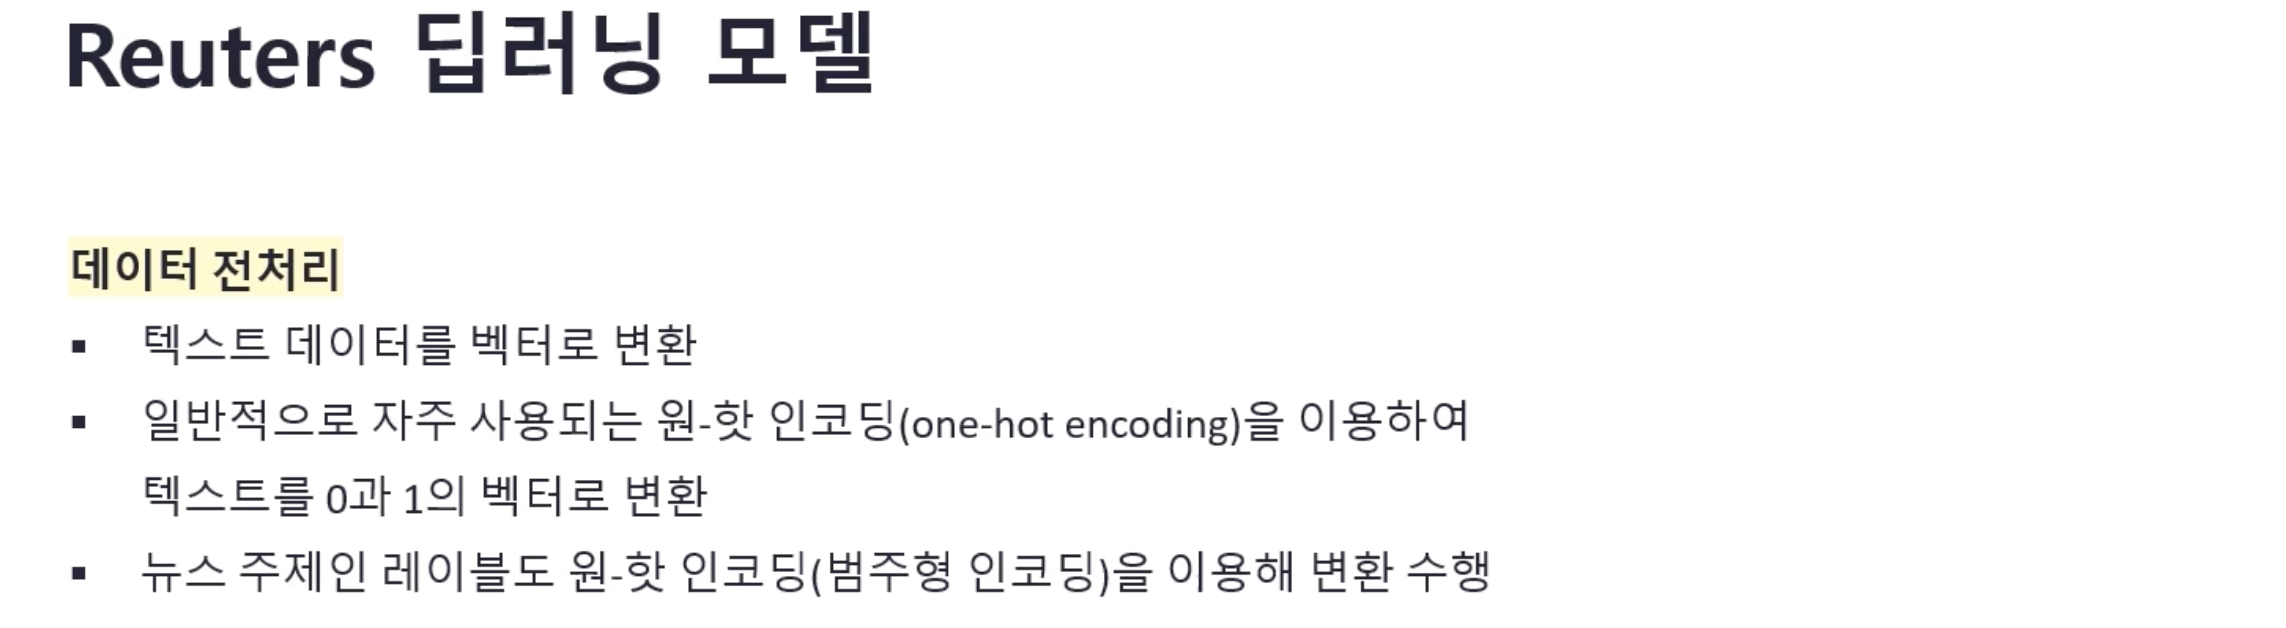

### 데이터 로드 및 전처리

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [247]:
dir(reuters)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_remove_long_seq',
 'get_file',
 'get_word_index',
 'json',
 'keras_export',
 'load_data',
 'logging',
 'np']

In [248]:
reuters.load_data

<function keras.datasets.reuters.load_data(path='reuters.npz', num_words=None, skip_top=0, maxlen=None, test_split=0.2, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)>

문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

`train_test_split`  
(
    *arrays,
    __test_size=None__,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)

In [67]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words= 10000) 
                
X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_labels, 
                                                  test_size= 0.25,
                                                 random_state= 2023)

In [68]:
print("전체 학습 데이터: {} 레이블: {}".format(train_data.shape, train_labels.shape))
print("학습 데이터: {} 레이블: {}".format(X_train.shape, Y_train.shape))
print("검증 데이터: {} 레이블: {}".format(X_val.shape, Y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(test_data.shape, test_labels.shape))

전체 학습 데이터: (8982,) 레이블: (8982,)
학습 데이터: (6736,) 레이블: (6736,)
검증 데이터: (2246,) 레이블: (2246,)
테스트 데이터: (2246,) 레이블: (2246,)


In [69]:
print(len(train_data))
print(len(X_val))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
2246
46


In [70]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(X_val)
x_test = one_hot_encoding(test_data)

In [71]:
x_train.shape, x_val.shape, x_test.shape

((8982, 10000), (2246, 10000), (2246, 10000))

레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [72]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)
y_val = utils.to_categorical(Y_val)

In [73]:
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [74]:
train_labels[5], y_train[5]

(4,
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [75]:
train_labels[15], y_train[15]

(8,
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [76]:
train_labels[25], y_train[25]

(1,
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

### 모델 구성 및 컴파일
BatchNormalization과 Dropout을 적용

In [77]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,303,086
Trainable params: 1,302,830
Non-trainable params: 256
_________________________________________________________________


In [79]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,303,086
Trainable params: 1,302,830
Non-trainable params: 256
_________________________________________________________________


### 모델 학습
ModelCheckpoint와 EarlyStopping 콜백 함수

In [80]:
from tensorflow.keras import callbacks

`callbacks.ModelCheckpoint`  
(
    __filepath,
    monitor='val_loss',
    verbose=0,
    save_best_only=False__,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    options=None,
    **kwargs,
)

`callbacks.EarlyStopping`  
(
    __monitor='val_loss'__,
    min_delta=0,
    __patience=0__,
    verbose=0,
    mode='auto',
    baseline=None,
    __restore_best_weights=False__,
)

In [81]:
check_point = callbacks.ModelCheckpoint('reuters.h5', 
                                           save_best_only=True)
early_stop = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point, early_stop])

Epoch 1/50
281/281 [==============================] - 2s 6ms/step - loss: 1.4227 - accuracy: 0.6845 - val_loss: 0.8252 - val_accuracy: 0.8375
Epoch 2/50
281/281 [==============================] - 1s 4ms/step - loss: 0.7978 - accuracy: 0.8177 - val_loss: 0.4339 - val_accuracy: 0.8887
Epoch 3/50
281/281 [==============================] - 1s 4ms/step - loss: 0.5834 - accuracy: 0.8686 - val_loss: 0.2636 - val_accuracy: 0.9319
Epoch 4/50
281/281 [==============================] - 1s 5ms/step - loss: 0.4503 - accuracy: 0.8952 - val_loss: 0.2251 - val_accuracy: 0.9421
Epoch 5/50
281/281 [==============================] - 1s 5ms/step - loss: 0.3767 - accuracy: 0.9130 - val_loss: 0.1685 - val_accuracy: 0.9519
Epoch 6/50
281/281 [==============================] - 1s 4ms/step - loss: 0.3295 - accuracy: 0.9247 - val_loss: 0.1550 - val_accuracy: 0.9604
Epoch 7/50
281/281 [==============================] - 1s 5ms/step - loss: 0.2998 - accuracy: 0.9311 - val_loss: 0.1446 - val_accuracy: 0.9662
Epoch 

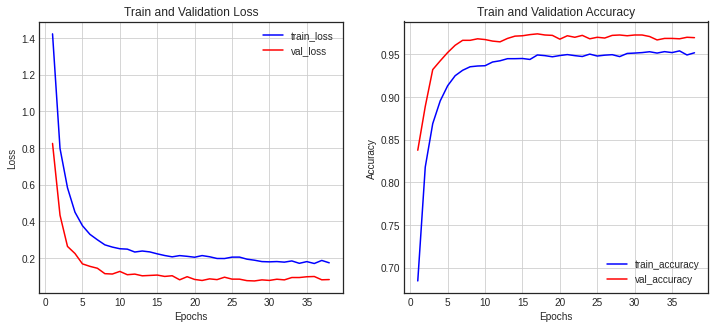

In [82]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [87]:
results = model.evaluate(x_test, y_test, verbose=2)
print(results)

71/71 - 0s - loss: 2.1887 - accuracy: 0.7836
[2.1886606216430664, 0.7836152911186218]


In [88]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(predictions)

(46,)
[[1.9402374e-11 1.6384400e-08 2.0010760e-14 ... 3.5099235e-13
  1.0324958e-16 1.4407184e-11]
 [8.4941575e-13 7.0633483e-05 2.7461892e-18 ... 2.3502308e-18
  2.7352179e-21 1.4382374e-08]
 [1.2461478e-18 1.0000000e+00 2.5443702e-16 ... 7.3769121e-24
  2.5557498e-25 9.9827038e-22]
 ...
 [5.1889487e-10 2.7011145e-05 1.9027499e-10 ... 9.6911177e-12
  6.9769225e-12 8.9709302e-11]
 [8.5067535e-07 6.8855868e-04 1.1134769e-09 ... 4.2062269e-09
  4.4911960e-14 2.1676418e-10]
 [1.0360435e-07 1.9382581e-03 7.3127227e-04 ... 1.1563688e-09
  1.4996268e-09 2.2758324e-09]]


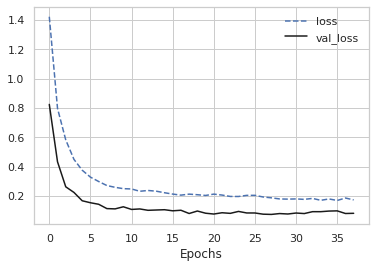

In [103]:
import seaborn as sns
sns.set(style= "whitegrid")

plt.plot(loss, 'b--', label= "loss")
plt.plot(val_loss, "k-", label= "val_loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

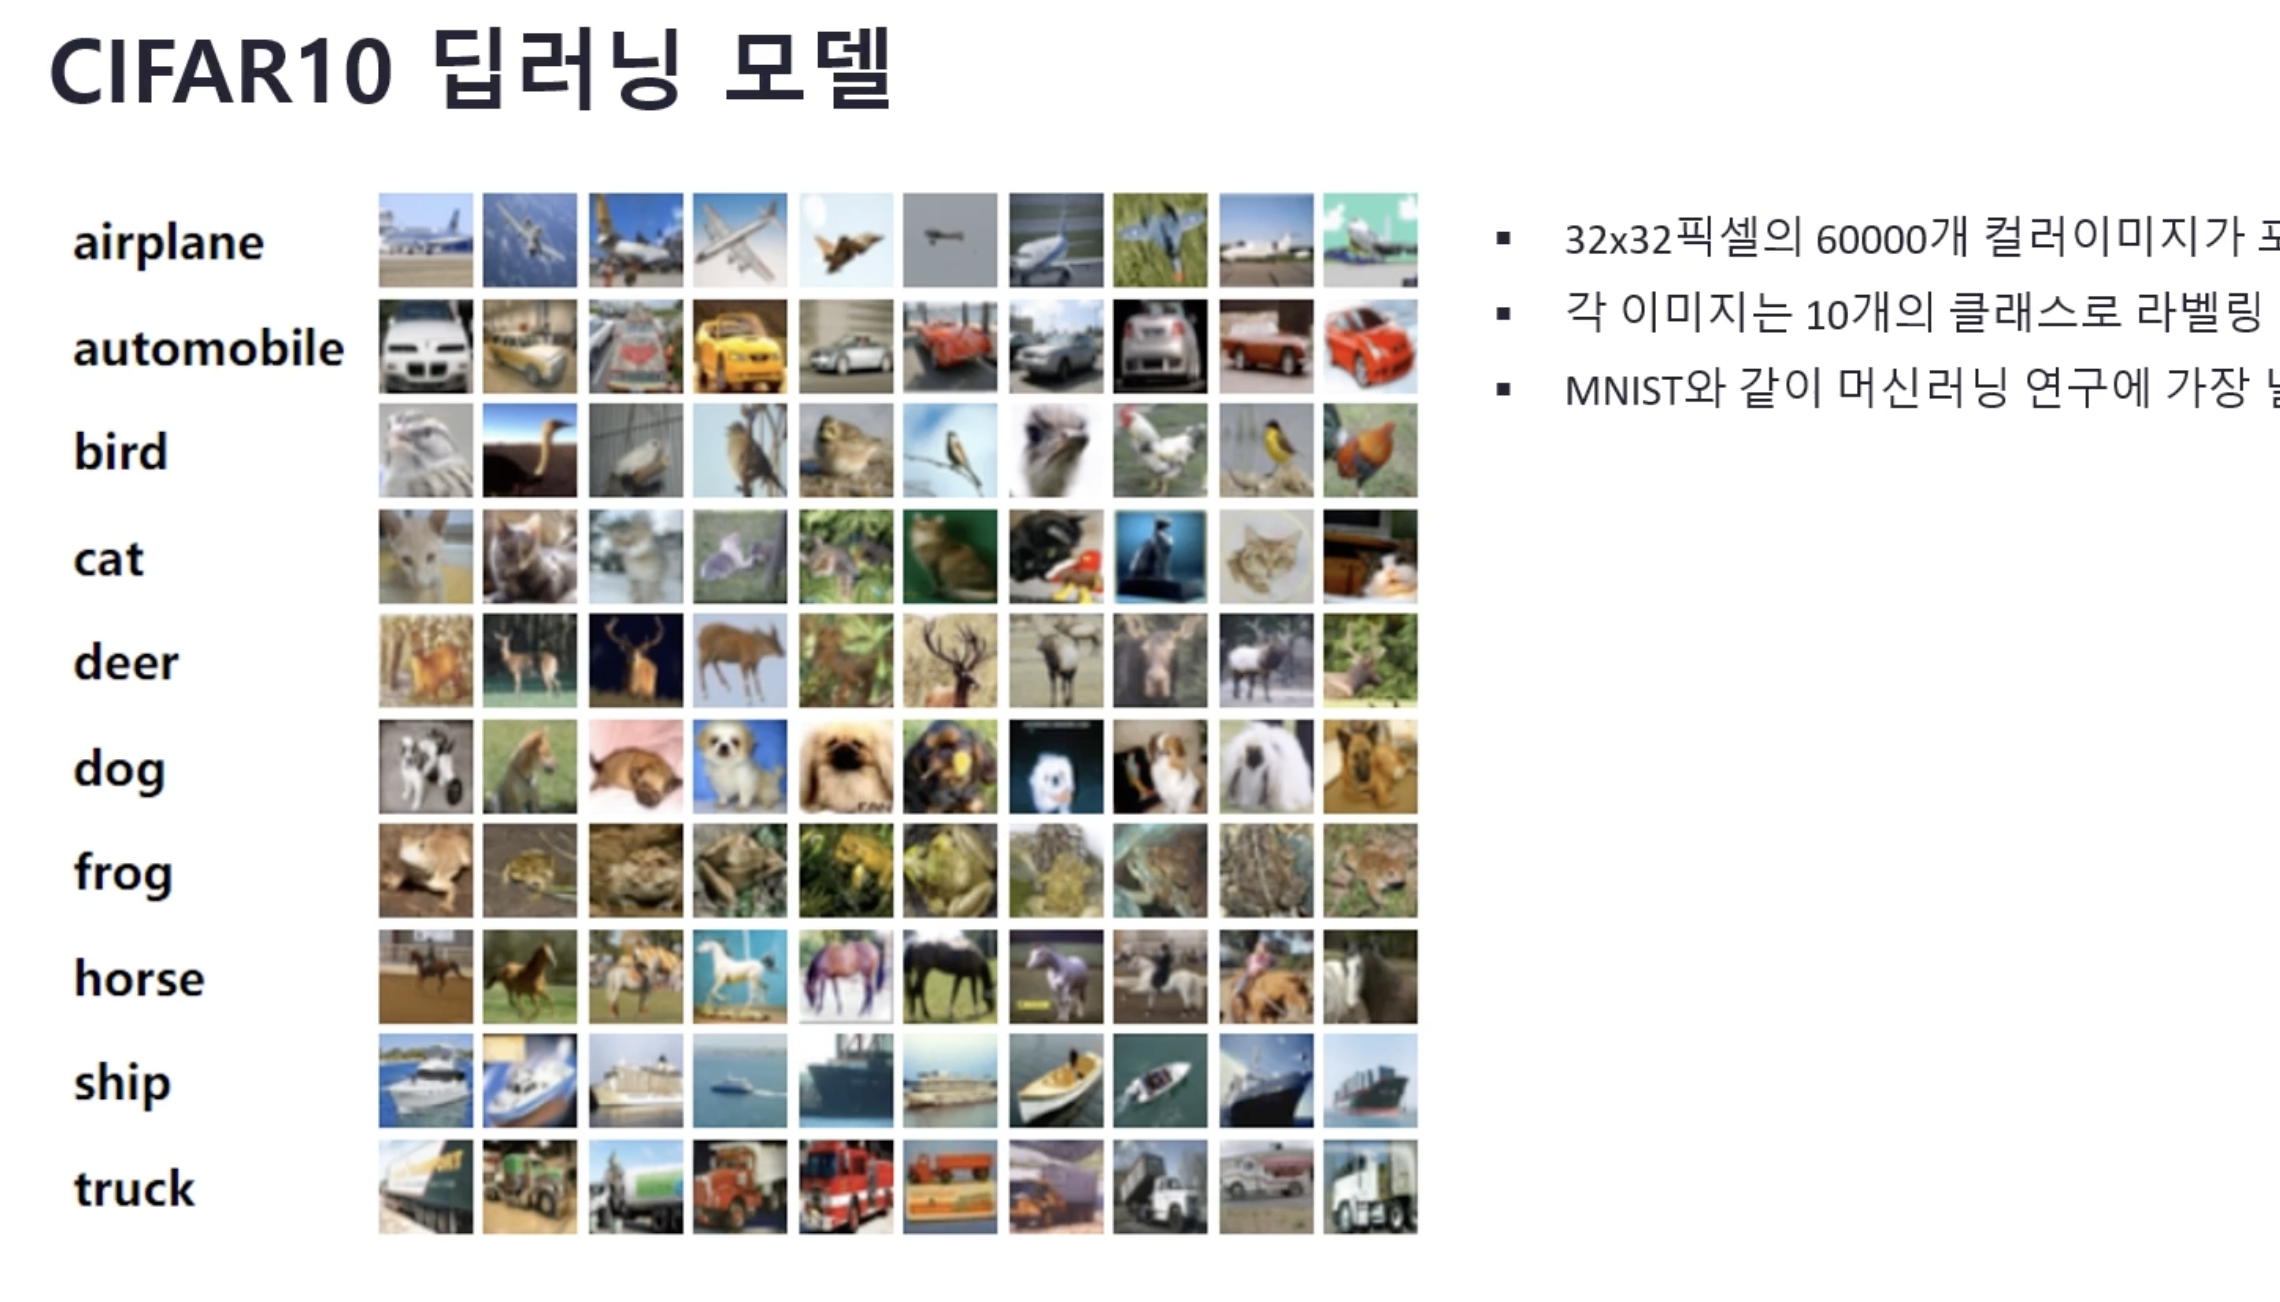

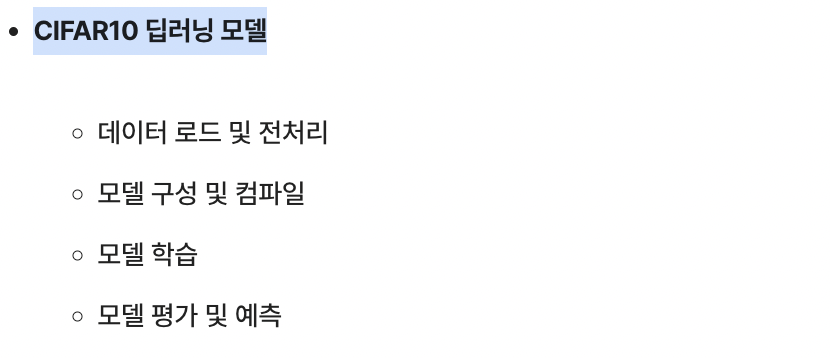

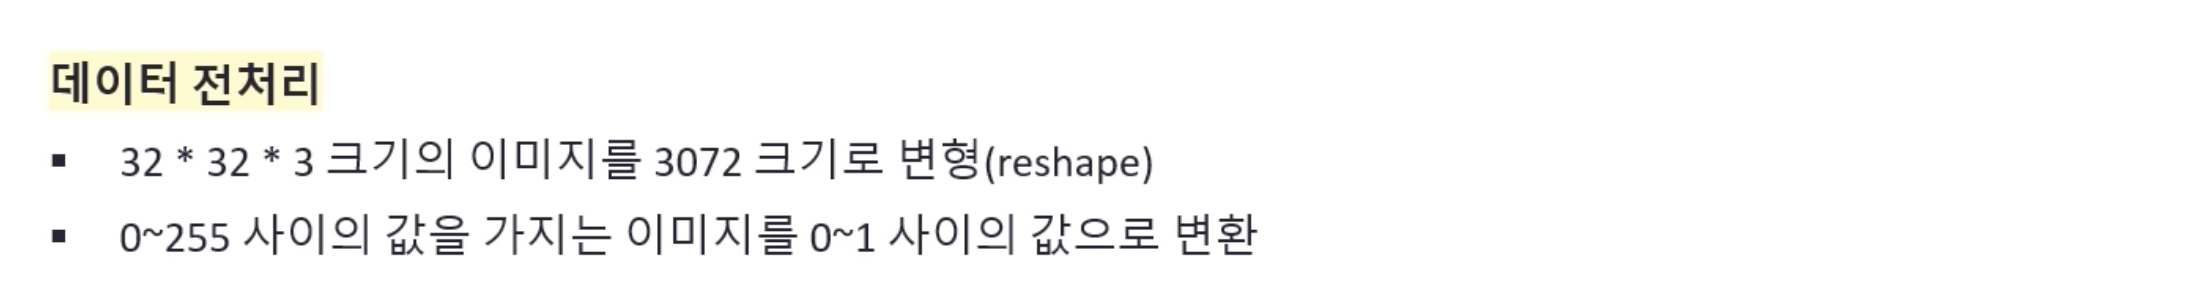

3 -> rgb

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.


In [119]:
dir(cifar10)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

| Label | Description |
|:-----:|:------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |


In [82]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [70]:
x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

`train_test_split`  
(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)

In [83]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size= 0.2,
                                                  random_state= 5555)

In [72]:
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [84]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.

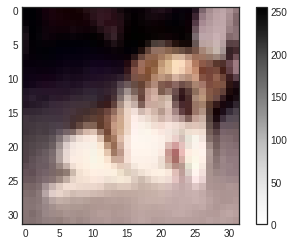

In [6]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [74]:
x_train.shape, x_val.shape, x_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [87]:
x_train.shape, x_val.shape, x_test.shape

((40000, 3072), (10000, 3072), (10000, 3072))

In [75]:
y_train.shape, y_val.shape, y_test.shape

((40000, 1), (10000, 1), (10000, 1))

In [88]:
y_train.shape, y_val.shape, y_test.shape

((40000, 1), (10000, 1), (10000, 1))

In [85]:
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3) 
x_test = x_test.reshape(-1, 32 * 32 * 3) 

훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.

In [86]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# 낚이지 말자.
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

-----------------

from tensorflow.keras import utils

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

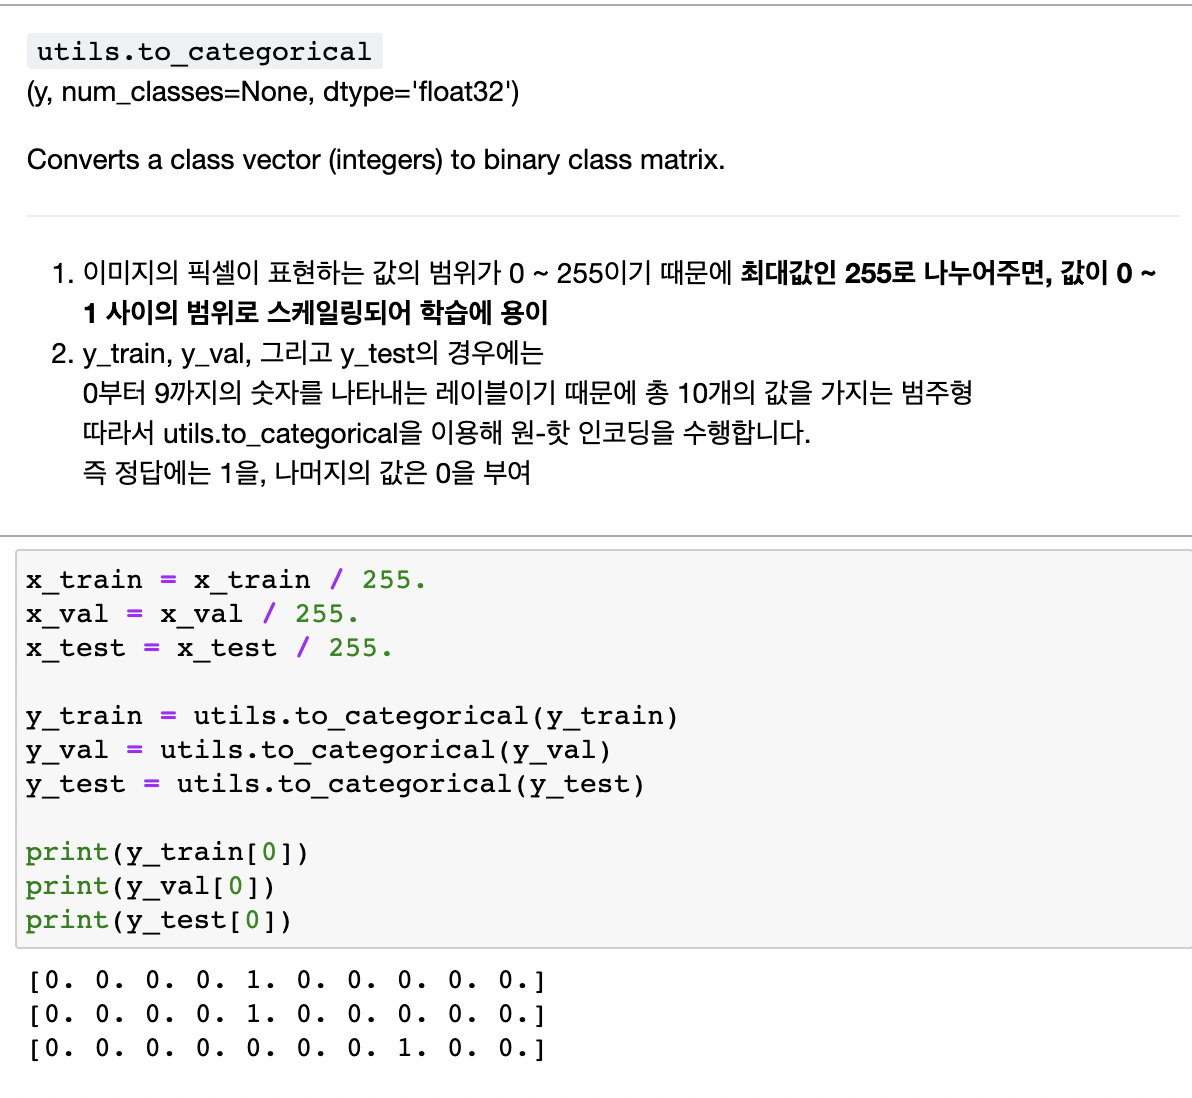  

# 이 노드에 낚였다.

In [79]:
x_train.shape, y_train.shape

((40000, 3072), (40000, 10))

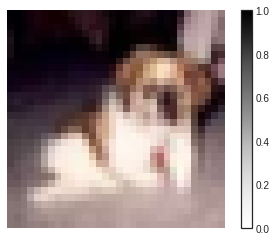

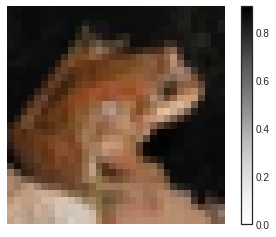

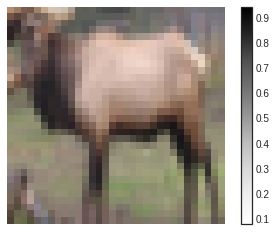

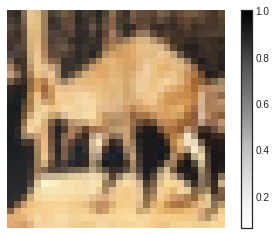

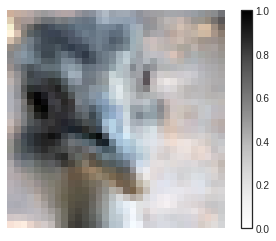

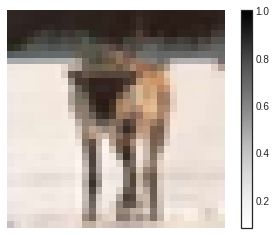

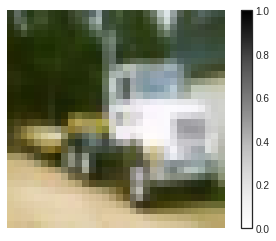

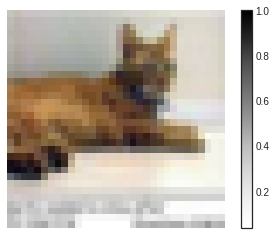

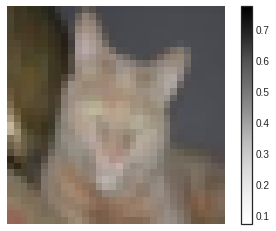

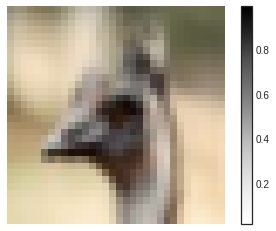

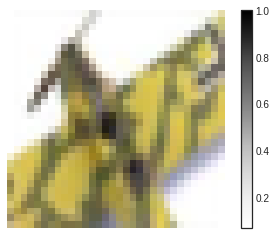

In [9]:
for i in range(10 +1):
    plt.figure()
    plt.imshow(x_train[i])
    plt.colorbar()
    plt.axis("off")
    plt.show()

### 모델 구성 및 컴파일

In [89]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(3072, activation='relu', input_shape=(3072, ), name='input'))
# model.add(layers.Flatten(input_shape=[32, 32, 3], name='flatten'))
# model.add(layers.Dense(3072, activation='relu', name='hidden0'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu', name='hidden1'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu', name='hidden2'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu', name='hidden3'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu', name='hidden4'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu', name='hidden5'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32, activation='relu', name='hidden6'))

model.add(layers.Dense(10, activation='softmax', name='output'))

`tensorflow GPU 메모리 오류`  
1. 배치 사이즈를 줄이기  
2. 입력 데이터의 사이즈를 줄이기  
https://iambeginnerdeveloper.tistory.com/69

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
batch_normalization_12 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
hidden2 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden3 (Dense)              (None, 256)              

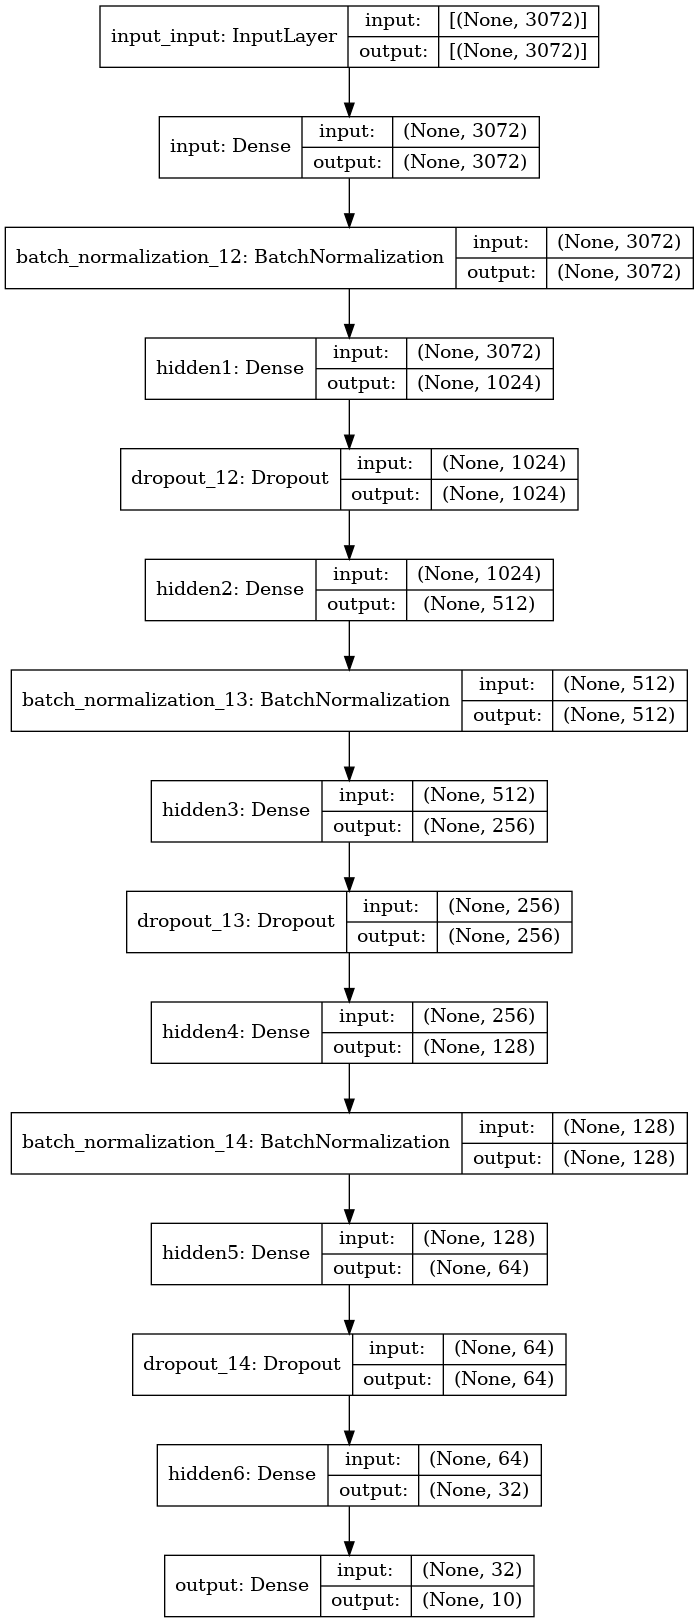

In [91]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

In [92]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
batch_normalization_12 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
hidden2 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden3 (Dense)              (None, 256)              

### 모델 학습

In [94]:
from tensorflow.keras import callbacks

In [95]:
check_point = callbacks.ModelCheckpoint('cifar10.h5', 
                                           save_best_only=True)
early_stop = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, 
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point, early_stop])

Epoch 1/50
79/79 [==============================] - 3s 20ms/step - loss: 2.5368 - accuracy: 0.1247 - val_loss: 2.2799 - val_accuracy: 0.1398
Epoch 2/50
79/79 [==============================] - 1s 13ms/step - loss: 2.3501 - accuracy: 0.1512 - val_loss: 2.2329 - val_accuracy: 0.1524
Epoch 3/50
79/79 [==============================] - 1s 13ms/step - loss: 2.2655 - accuracy: 0.1763 - val_loss: 2.1688 - val_accuracy: 0.1834
Epoch 4/50
79/79 [==============================] - 1s 13ms/step - loss: 2.2040 - accuracy: 0.1937 - val_loss: 2.0833 - val_accuracy: 0.2344
Epoch 5/50
79/79 [==============================] - 1s 13ms/step - loss: 2.1536 - accuracy: 0.2114 - val_loss: 2.0121 - val_accuracy: 0.2641
Epoch 6/50
79/79 [==============================] - 1s 13ms/step - loss: 2.1053 - accuracy: 0.2236 - val_loss: 1.9646 - val_accuracy: 0.2814
Epoch 7/50
79/79 [==============================] - 1s 13ms/step - loss: 2.0714 - accuracy: 0.2338 - val_loss: 1.9369 - val_accuracy: 0.2867
Epoch 8/50
79

`utils.to_categorical`를 y_test[val, train]에 적용하다가 4시간 걸리다.  
1. ValueError: Input 0 of layer sequential_9 is incompatible with the layer: expected axis -1 of input shape to have value 32 but received input with shape (32, 32, 32, 3)  
2. Shape mismatch: The shape of labels (received (32,)) should equal the shape of logits except for the last dimension (received (32768, 10)).  
하지만 수경님 덕분에 극복했다는 전설이 내려졌다.

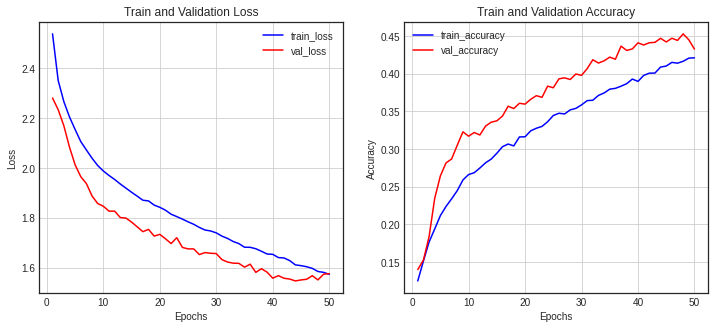

In [96]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [97]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5615 - accuracy: 0.4432


[1.5614947080612183, 0.4431999921798706]

# 회고
#### 이번 프로젝트의 3가지 데이터  
1. boston 주택가격 예측  
2. reuters  
3. cifar10  

#### 이번 프로젝트 순서  
1. 데이터 로드 및 전처리  
2. 모델 구성 및 컴파일
3. 모델 학습
4. 모델 평가 및 예측

회귀 및 분류 문제에 따라 전처리 방식이 다소 다르고  
모델 구성 방식에서 어떤 액티베이션 뻥션을 사용할까 어떤식으로 코드를 짜고 나서  
어떠한 로옵메(로스, 옵티마이저, 메트릭스) 사용할지 또한 고민해봐야 한다.  
그 후 모델 학습할 때에도 학습이 잘 되어가는지 브롸드카스팅이 잘 맞는지 디멘션도 잘 맞는지 잘 조절해야한다.  
마지막 모델 평가 및 예측은 이벨류에이션속에 테스트 제품을 넣으라.  

이러한 과정을 거치면서 조금은 견문이 넓어졌습니다.
이번 프로젝트가 멘땅에 헤딩(?)같은 느낌을 들었지만  
분명 실전에서는 이런 일들이 지금 보다 몇 배 수십배는 많아질 거라 생각이 문득 들어  
이번 이런 경험들이 다음에는 큰 자산으로 남을 거란 생각을 다시 하게 되었던 그런 시간이였습니다.  
그럼에도 불구하고 나아가야할 길은 멀고 험난하겠지만  
하루하루 복습하고 복습해서 인지할 수 있게될 그런 여유가 생겼으면 좋겠다유.  

1. (x_train_full, y_train_full), (x_test, y_test)  
    모델 불러올 때 순서 잘 알아야 한다.  
2. x_train, x_val, y_train, y_val  
    train_test_split할 때 순서 잘 알아야 한다.  
3. from tensorflow.keras import models, layers, utils, optimizers  
    keras에 models layers utils optimizers가 있다.
4. train_data.mean(axis=0)  
    axis 지정해야한다.  
5. utils.to_categorical 필요한가 필요 없는가 확인해보자.  

P.S 나는 지금 춥고 배고프고 졸리다. 거지상태다.